### Turner Luo STAT 6289 HW3 
github link: https://github.com/TurnerLuo/STAT6289.git

In [59]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from matplotlib.pyplot import figure

### Load the dataset:

In [110]:
df=pd.read_csv("/content/TSLA.csv")
print("Number of rows and columns:", df.shape)
df.head(5)

Number of rows and columns: (1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


In [111]:
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1254,2020-07-02,244.296005,245.600006,237.119995,241.731995,241.731995,86250500
1255,2020-07-06,255.337997,275.558014,253.207993,274.316010,274.316010,102849500
1256,2020-07-07,281.002014,285.899994,267.342010,277.971985,277.971985,107448500
1257,2020-07-08,281.000000,283.451996,262.268005,273.175995,273.175995,81556500
1258,2020-07-09,279.398010,281.712006,270.256012,278.855988,278.855988,58588000


### Split training set and testing set:

In [112]:
training_set = df.iloc[:800,1:2].values
test_set = df.iloc[800:,1:2].values

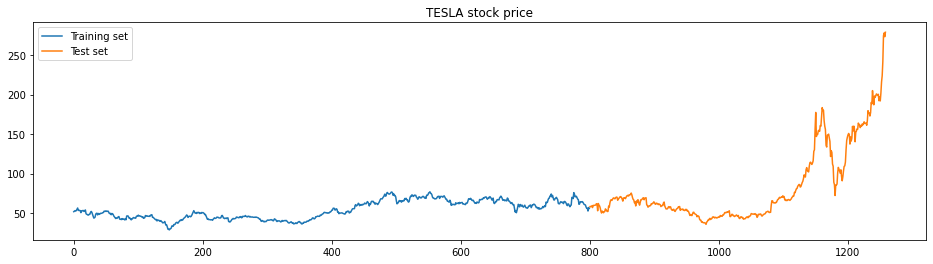

In [162]:
df["Close"][:800].plot(figsize=(16,4),legend=True)
df["Close"][800:].plot(figsize=(16,4),legend=True)
plt.legend(['Training set','Test set'])
plt.title('TESLA stock price')
plt.show()

### Scaling the training set:

In [163]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

### Create a data structure with 60 timesteps and 1 output:

In [164]:
X_train = []
y_train = []
for i in range(60,800):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Build the LSTM model:
LSTM with 50 neurons and 4 hidden layers.

In [165]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 9s 116ms/step - loss: 0.0771
Epoch 2/100
24/24 [==============================] - 3s 122ms/step - loss: 0.0168
Epoch 3/100
24/24 [==============================] - 3s 134ms/step - loss: 0.0130
Epoch 4/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0124
Epoch 5/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0143
Epoch 6/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0118
Epoch 7/100
24/24 [==============================] - 3s 117ms/step - loss: 0.0105
Epoch 8/100
24/24 [==============================] - 4s 174ms/step - loss: 0.0108
Epoch 9/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0115
Epoch 10/100
24/24 [==============================] - 3s 117ms/step - loss: 0.0099
Epoch 11/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0105
Epoch 12/100
24/24 [==============================] - 3s 117ms/step - loss: 0.0097
Epoch 13/100


### Prepare the test set:

In [166]:
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(459, 60, 1)


In [167]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results:

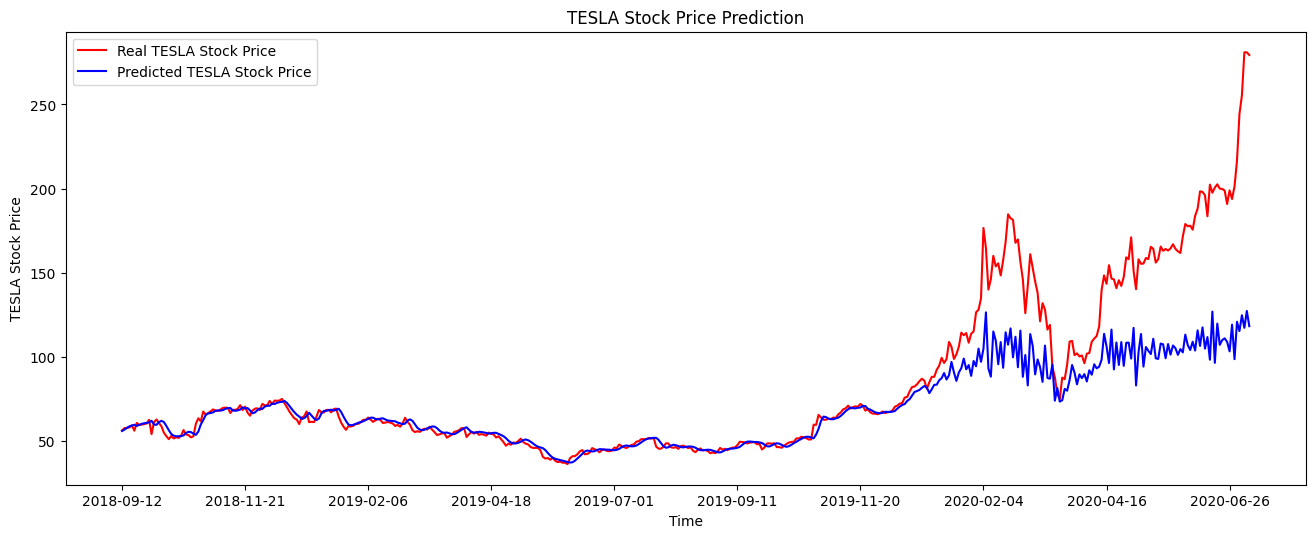

In [63]:
figure(figsize=(16,6), dpi=100)
plt.plot(df.loc[800:, "Date"],dataset_test.values, color = "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [56]:
def return_rmse(dataset_test,predicted_stock_price):
    rmse = math.sqrt(mean_squared_error(dataset_test.values,predicted_stock_price))
    print("The root mean squared error is {}.".format(rmse))

In [58]:
return_rmse(dataset_test,predicted_stock_price)

The root mean squared error is 31.55361904123942.


### Build the input features with different time lags (7 days, 14 days):
7 days

In [169]:
X_train = []
y_train = []
for i in range(60,800,7):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [177]:
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,519,7):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(66, 60, 1)


In [180]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

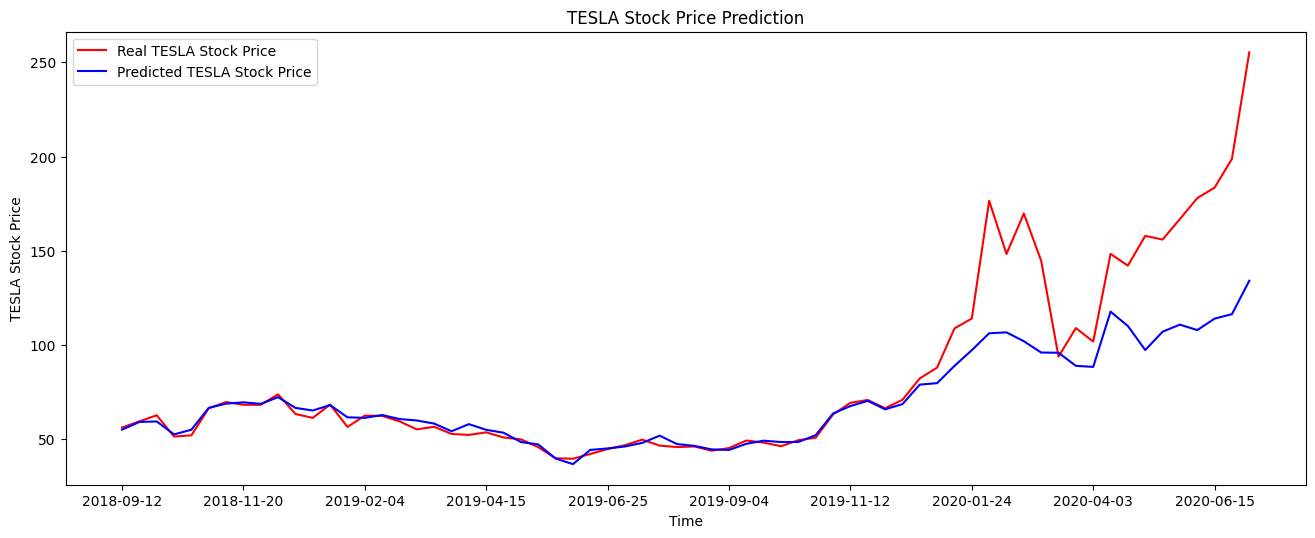

In [182]:
figure(figsize=(16,6), dpi=100)
plt.plot(df.loc[800::7, "Date"],dataset_test.values[::7], color = "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[800::7, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,66,7))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

14 day:

In [133]:
X_train = []
y_train = []
for i in range(60,800,14):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [134]:
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,519,14):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(33, 60, 1)


In [135]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

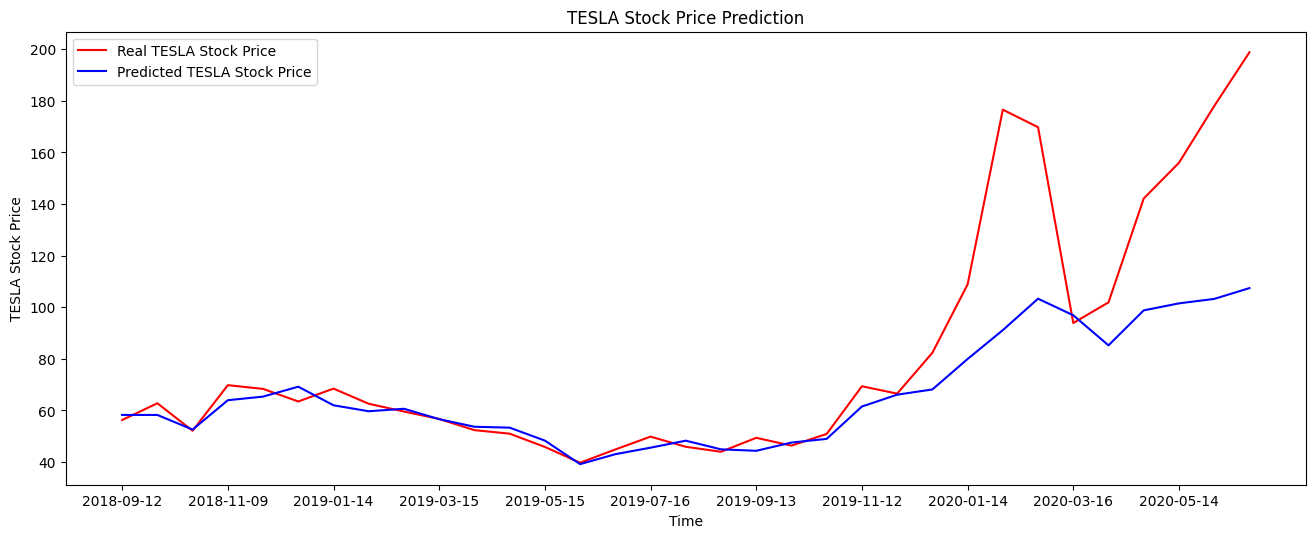

In [138]:
figure(figsize=(16,6), dpi=100)
plt.plot(df.loc[800::14, "Date"],dataset_test.values[::14], color = "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[800::14, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,33,3))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

### Model 2 with step 1 and 6 hidden layers:

In [143]:
X_train = []
y_train = []
for i in range(60,800):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [149]:
model2 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model2.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a fifth LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a sixth LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50))
model2.add(Dropout(0.2))
# Adding the output layer
model2.add(Dense(units = 1))

# Compiling the RNN
model2.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model2.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 14s 171ms/step - loss: 0.0675
Epoch 2/100
24/24 [==============================] - 4s 175ms/step - loss: 0.0189
Epoch 3/100
24/24 [==============================] - 4s 171ms/step - loss: 0.0158
Epoch 4/100
24/24 [==============================] - 4s 173ms/step - loss: 0.0153
Epoch 5/100
24/24 [==============================] - 6s 236ms/step - loss: 0.0148
Epoch 6/100
24/24 [==============================] - 5s 204ms/step - loss: 0.0143
Epoch 7/100
24/24 [==============================] - 9s 380ms/step - loss: 0.0161
Epoch 8/100
24/24 [==============================] - 6s 245ms/step - loss: 0.0147
Epoch 9/100
24/24 [==============================] - 4s 173ms/step - loss: 0.0133
Epoch 10/100
24/24 [==============================] - 6s 268ms/step - loss: 0.0126
Epoch 11/100
24/24 [==============================] - 6s 233ms/step - loss: 0.0134
Epoch 12/100
24/24 [==============================] - 4s 173ms/step - loss: 0.0142
Epoch 13/100

In [151]:
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(459, 60, 1)


In [152]:
predicted_stock_price_2 = model2.predict(X_test)
predicted_stock_price_2 = sc.inverse_transform(predicted_stock_price_2)

### Model 3 with 4 hidden layers and drop rate = 0.1:

In [153]:
X_train = []
y_train = []
for i in range(60,800):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [154]:
model3 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model3.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model3.add(Dropout(0.1))
# Adding a second LSTM layer and some Dropout regularisation
model3.add(LSTM(units = 50, return_sequences = True))
model3.add(Dropout(0.1))
# Adding a third LSTM layer and some Dropout regularisation
model3.add(LSTM(units = 50, return_sequences = True))
model3.add(Dropout(0.1))
# Adding a fourth LSTM layer and some Dropout regularisation
model3.add(LSTM(units = 50))
model3.add(Dropout(0.1))
# Adding the output layer
model3.add(Dense(units = 1))

# Compiling the RNN
model3.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model3.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 10s 116ms/step - loss: 0.0509
Epoch 2/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0122
Epoch 3/100
24/24 [==============================] - 3s 117ms/step - loss: 0.0106
Epoch 4/100
24/24 [==============================] - 3s 114ms/step - loss: 0.0107
Epoch 5/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0098
Epoch 6/100
24/24 [==============================] - 3s 125ms/step - loss: 0.0106
Epoch 7/100
24/24 [==============================] - 4s 182ms/step - loss: 0.0101
Epoch 8/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0086
Epoch 9/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0087
Epoch 10/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0090
Epoch 11/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0077
Epoch 12/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0086
Epoch 13/100

In [155]:
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(459, 60, 1)


In [156]:
predicted_stock_price_3 = model3.predict(X_test)
predicted_stock_price_3 = sc.inverse_transform(predicted_stock_price_3)

### Model 4 with 4 hidden layers and batch size = 64:

In [157]:
X_train = []
y_train = []
for i in range(60,800):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [158]:
model4 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model4.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model4.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model4.add(LSTM(units = 50, return_sequences = True))
model4.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model4.add(LSTM(units = 50, return_sequences = True))
model4.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model4.add(LSTM(units = 50))
model4.add(Dropout(0.2))
# Adding the output layer
model4.add(Dense(units = 1))

# Compiling the RNN
model4.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model4.fit(X_train, y_train, epochs = 100, batch_size = 64)

Epoch 1/100
12/12 [==============================] - 10s 147ms/step - loss: 0.0785
Epoch 2/100
12/12 [==============================] - 2s 144ms/step - loss: 0.0257
Epoch 3/100
12/12 [==============================] - 2s 145ms/step - loss: 0.0155
Epoch 4/100
12/12 [==============================] - 2s 144ms/step - loss: 0.0129
Epoch 5/100
12/12 [==============================] - 2s 147ms/step - loss: 0.0126
Epoch 6/100
12/12 [==============================] - 2s 145ms/step - loss: 0.0117
Epoch 7/100
12/12 [==============================] - 2s 148ms/step - loss: 0.0122
Epoch 8/100
12/12 [==============================] - 2s 144ms/step - loss: 0.0120
Epoch 9/100
12/12 [==============================] - 2s 146ms/step - loss: 0.0116
Epoch 10/100
12/12 [==============================] - 2s 144ms/step - loss: 0.0118
Epoch 11/100
12/12 [==============================] - 2s 144ms/step - loss: 0.0115
Epoch 12/100
12/12 [==============================] - 2s 145ms/step - loss: 0.0112
Epoch 13/100

In [159]:
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(459, 60, 1)


In [160]:
predicted_stock_price_4 = model4.predict(X_test)
predicted_stock_price_4 = sc.inverse_transform(predicted_stock_price_4)

### Visually compare model 1, 2, 3, 4:

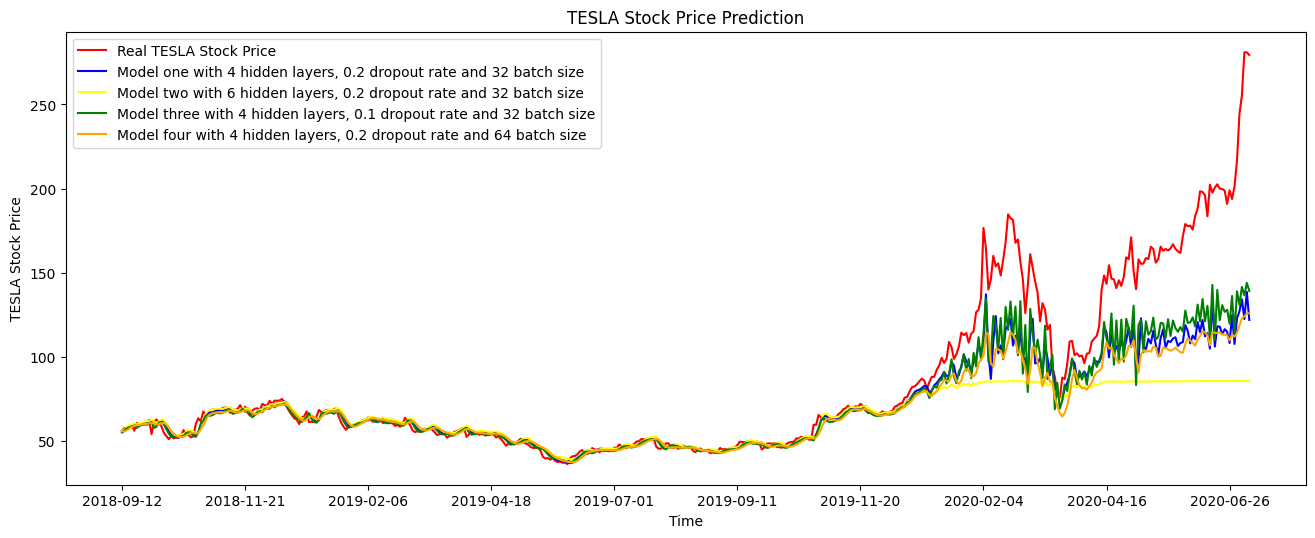

In [168]:
figure(figsize=(16,6), dpi=100)
plt.plot(df.loc[800:, "Date"],dataset_test.values, color = "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Model one with 4 hidden layers, 0.2 dropout rate and 32 batch size")
plt.plot(df.loc[800:, "Date"],predicted_stock_price_2, color = "yellow", label = "Model two with 6 hidden layers, 0.2 dropout rate and 32 batch size")
plt.plot(df.loc[800:, "Date"],predicted_stock_price_3, color = "green", label = "Model three with 4 hidden layers, 0.1 dropout rate and 32 batch size")
plt.plot(df.loc[800:, "Date"],predicted_stock_price_4, color = "orange", label = "Model four with 4 hidden layers, 0.2 dropout rate and 64 batch size")
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()